## Inferential Analysis Assignment

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### 1. Replace the Null values

In [5]:
# Respective to the problem statement have to replace the missing values (like 0)
dataset["salary"].fillna(0,inplace=True)

In [6]:
dataset.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

#### Explanation

#### Replace the slary null values with constant(0), because in this placement dataset miising salary is truely refers to not placed

### 2. How many of them are not placed?

In [8]:
#(dataset['status'].str.lower() == 'not placed').sum()
df=dataset
df[df['status'].str.lower() == 'not placed'].shape[0] #Gets the number of rows in the filtered DataFrame

67

### 3. Find the reason for not placement in the dataset

In [9]:
def infer_reason(row):
    reasons = []
    if row['mba_p'] < df['mba_p'].mean():
        reasons.append("Low MBA Score")
    if row['degree_p'] < df['degree_p'].mean():
        reasons.append("Low Degree Score")
    if row['etest_p'] < df['etest_p'].mean():
        reasons.append("Low E-Test Score")
    if row['workex'] == 'No':
        reasons.append("No Work Experience")
    if not reasons:
        reasons.append("Unknown")
    return ', '.join(reasons)

# Create a new column for inferred reasons
#We want to evaluate multiple columns in each row to decide the reason for "Not Placed". That means we want to process row by row so we use apply() here
df['Notplaced_Reason'] = df.apply(lambda row: infer_reason(row) if row['status'] == 'Not Placed' else '-', axis=1)


In [10]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Notplaced_Reason
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,-
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,-
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,-
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,"Low MBA Score, Low Degree Score, Low E-Test Sc..."
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,-
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,-
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,-
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,-


### 4. What kind of relation between salary and mba_p

In [11]:
correlation = df[['mba_p', 'salary']].corr()
print(correlation)

           mba_p    salary
mba_p   1.000000  0.139823
salary  0.139823  1.000000


#### Correlation between Mba_p and Salary is 0.1398. Hence, it is a low degree of positive correlation (Directly propotional but 0nly 13%)

### 5. Which specialization is getting the minimum salary?

In [12]:
placed = df[(df['status'] == 'Placed') & (df['salary'].notnull())]

# Find the minimum salary value
min_salary = placed['salary'].min()

# Find all rows with that minimum salary
min_salary_rows = placed[placed['salary'] == min_salary]

# Get unique specializations from those rows
specializations = min_salary_rows['specialisation'].unique()

print(f"Minimum salary is: {min_salary}")
#print("Minimum salary is:", min_salary)
#print("Minimum salary is: " + str(min_salary)) 

print("Specialization(s) receiving Minimum salary:")

for spec in specializations:
    print(f"- {spec}")

Minimum salary is: 200000.0
Specialization(s) receiving Minimum salary:
- Mkt&Fin
- Mkt&HR


In [13]:
min_salary

200000.0

In [14]:
min_salary_rows

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Notplaced_Reason
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,-
15,16,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.0,Mkt&Fin,64.66,Placed,200000.0,-
44,45,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.0,Mkt&Fin,69.70,Placed,200000.0,-
50,51,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.0,Mkt&HR,62.98,Placed,200000.0,-
107,108,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.0,Mkt&HR,73.52,Placed,200000.0,-
135,136,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.6,Mkt&HR,65.63,Placed,200000.0,-


In [15]:
specializations

array(['Mkt&Fin', 'Mkt&HR'], dtype=object)

### 6. How many of them getting above 500000 salary?

In [16]:
max_salary = df[df['salary'] > 500000]
print("In the placement dataset",len(max_salary) , "of them were getting salary above 500000")

In the placement dataset 3 of them were getting salary above 500000


In [17]:
max_salary

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Notplaced_Reason
119,120,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0,-
150,151,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0,-
177,178,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0,-


### 7. Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

#### Statement: Is there any difference between etest_p and mba_p marks

#### Solution:

#### H0 - There is no significant difference between marks
#### H1 - There is a significant difference between marks

In [18]:
from scipy.stats import f_oneway

t_stat, p_value = f_oneway(dataset['etest_p'], dataset['mba_p'])

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 98.64487057324706
P-value: 4.672547689133573e-21


In [19]:
p_value

4.672547689133573e-21

#### conclusion

#### p-value=4.67<0.05, codition false so we Accept Null hypothesis. There is no significant difference between the means of etest_p and mba_p at the 5% significance level.

### 8. Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)

#### Statement: Is there any similarity between degree_t (sci& Tech) and specialisation (mkt&HR) with respect to salary

#### solution

#### H0 - There is no similarity between degree_t(Sci&Tech) and specialisation(Mkt&HR)
#### H1 - There is a similarity  between degree_t(Sci&Tech) and specialisation(Mkt&HR)

In [20]:
from scipy.stats import ttest_ind

sci_tech_salary =df[(df['degree_t'] == 'Sci&Tech') & df['salary'].notna()]['salary']
mkt_hr_salary = df[(df['specialisation'] == 'Mkt&HR') & df['salary'].notna()]['salary']

# Perform Welch's t-test (assumes unequal variances)
t_stat, p_value = ttest_ind(sci_tech_salary, mkt_hr_salary)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Hypothesis testing decision
if p_value < 0.05:
    print("Result: Reject the null hypothesis. There is a similarity between degree_t(Sci&Tech) and specialisation(Mkt&HR)")
else:
    print("Result: Fail to reject the null hypothesis. No similarity between degree_t(Sci&Tech) and specialisation(Mkt&HR)")


T-statistic: 2.692041243555374
P-value: 0.007897969943471179
Result: Reject the null hypothesis. There is a similarity between degree_t(Sci&Tech) and specialisation(Mkt&HR)


#### conclusion

#### Reject Null hypothesis. There is a similarity between degree_t(Sci&Tech) and specialisation(Mkt&HR)

### 9. Convert the normal distribution to standard normal distribution for salary column

C:\Anaconda\envs\aiml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


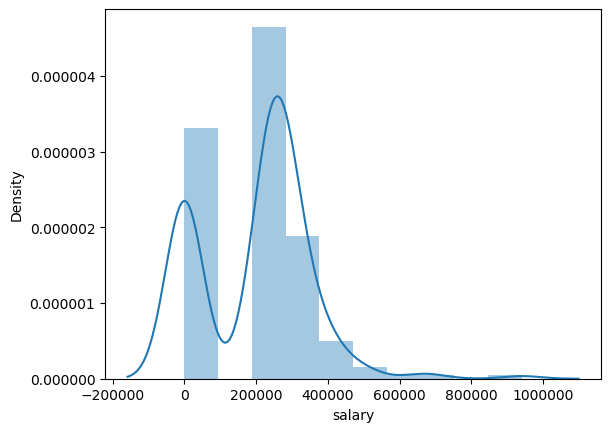

In [21]:
import seaborn as sns
sns.distplot(dataset["salary"])

#### Standard Normal Distribution

In [22]:
def stdNBgraph(dataset):
    # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)

C:\Anaconda\envs\aiml\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":


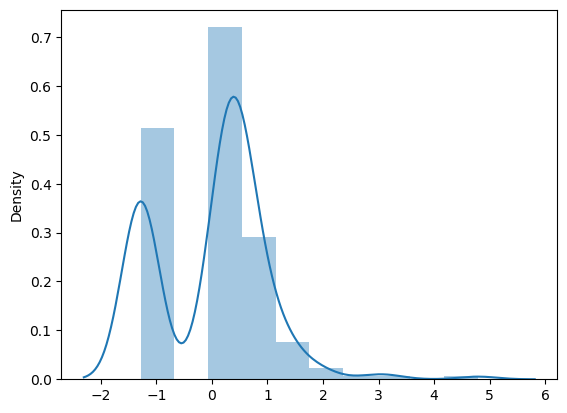

In [23]:
stdNBgraph(dataset["salary"])

### 10. What is the probability Density Function of the salary range from 700000 to 900000?

In [24]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

C:\Anaconda\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


Mean=198702.326, Standard Deviation=154780.927
The area between range(700000,900000):0.0005973310593974868


0.0005973310593974868

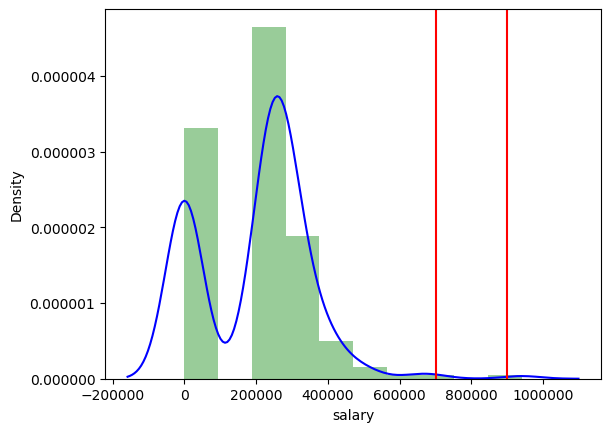

In [25]:
get_pdf_probability(dataset["salary"],700000,900000)

### 11. Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

#### Statement : Test whether etest_p mark with degree_t(Sci&Tech) and mba_p mark with degree_t(Sci&Tech) are similar?

#### Solution

#### H0 - There is no similarity between etest_p mark with degree_t(Sci&Tech) and mba_p mark with degree_t(Sci&Tech)
#### H1 - There is a similarity  between etest_p mark with degree_t(Sci&Tech) and mba_p mark with degree_t(Sci&Tech)

In [26]:
from scipy.stats import ttest_rel

sci_tech = dataset[(dataset['degree_t'] == 'Sci&Tech')]['etest_p']
sci_tech1 = dataset[(dataset['degree_t'] == 'Sci&Tech')]['mba_p']
t_stat, p_value = ttest_rel(sci_tech,sci_tech1)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 5.0049844583693615
P-value: 5.517920600505392e-06


#### Conclusion

#### For the above statement p-value is greater than 0.05, Hence we accept Null hypothesis, There is no similarity between etest_p mark with degree_t(Sci&Tech) and mba_p mark with degree_t(Sci&Tech)

### 12. Which parameter is highly correlated with salary?

In [27]:
#dataset.corr()

correlations = dataset.corr()['salary'].drop('salary')
print(correlations)
print("\nMost highly correlated parameter with salary:", correlations.idxmax())


sl_no       0.002543
ssc_p       0.538090
hsc_p       0.452569
degree_p    0.408371
etest_p     0.186988
mba_p       0.139823
Name: salary, dtype: float64

Most highly correlated parameter with salary: ssc_p


### 13. plot any useful graph and explain it.

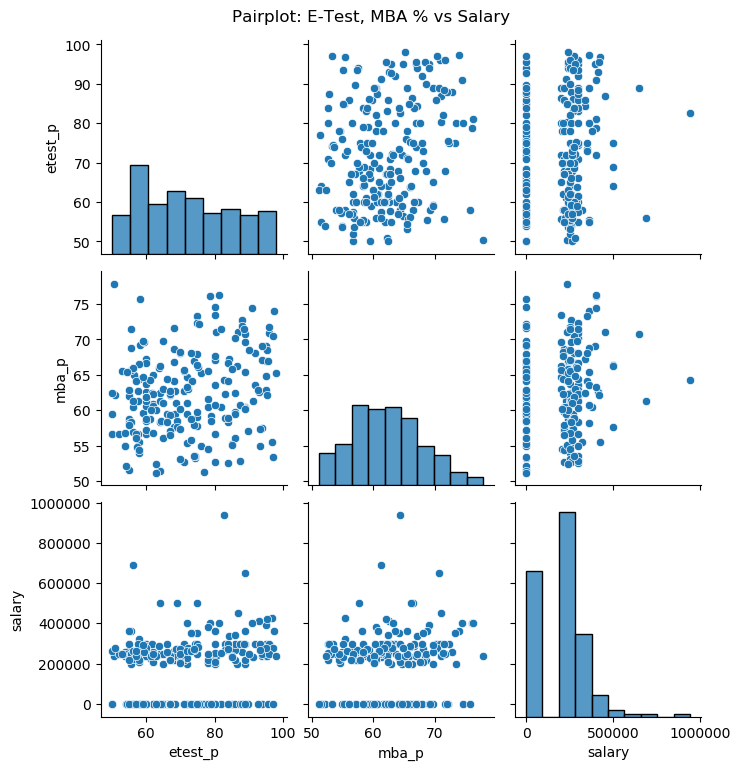

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

df_clean = df[['etest_p', 'mba_p', 'salary']]

# Create the pairplot
sns.pairplot(df_clean)
plt.suptitle('Pairplot: E-Test, MBA % vs Salary', y=1.02)
plt.show()

#### Explanation :

##### The above pairplot shows the relationships between students academic scores (etest_p, mba_p) and their placement salary.

##### Histogram:

##### etest_p, and mba_p are all somewhat normally distributed.

##### salary is right-skewed, meaning most students earn lower salaries, and only a few earn high salaries.

##### etest_p vs salary:
##### Slight upward trend — students with higher etest scores tend to get higher salaries, but the relationship is weak.

##### mba_p vs salary:
##### There is a more noticeable upward trend — this implies that students with higher MBA percentages are somewhat more likely to receive higher salaries.

##### The pairplot reveals that while etest scores (etest_p) and MBA percentages (mba_p) have weak to moderate positive correlations with placement salary.